# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from numpy import log as ln
from math import cos, sqrt

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def f(x):
  return ln(x) * cos(x)

def chart(a, b, n):
  h = abs(b - a) / n
  x = a
  points = [[], []]
  while x <= b:
    y = f(x)
    points[0].append(x)
    points[1].append(y)
    x += h
  return points

def gsc(a, b, f, eps=sys.float_info.epsilon):
  '''Golden section search'''
  count = 0
  while True:
    x1 = a + .381966 * (b - a)
    x2 = a + .618034 * (b - a)
    if abs(b - a) <= eps:
      break
    if f(x1) < f(x2):
        b = x2
    else:
        a = x1
    count += 1
  print('Кол-во итераций', count)
  return a + (b - a) / 2

def dichotomy(a, b, f, eps=sys.float_info.epsilon):
  '''Golden section search'''
  count = 0
  while True:
    x = a + .5 * (b - a)
    if abs(b - a) <= eps:
      break
    if f(a) < f(b):
        b = x
    else:
        a = x
    count += 1
  print('Кол-во итераций', count)
  return a + (b - a) / 2

# Task

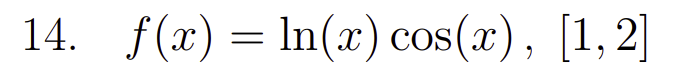

# Golden section search

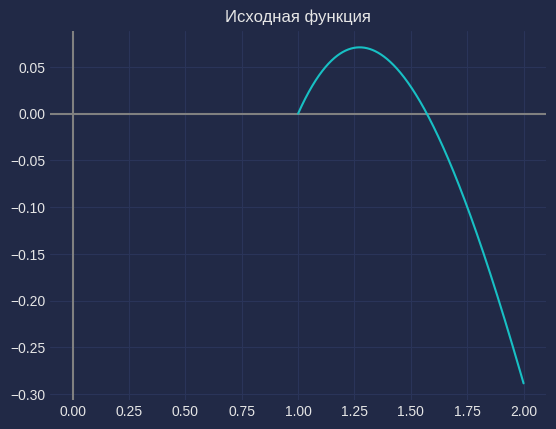

In [ ]:
a, b, n = 1, 2, 1e3
x, y = chart(a, b, 1e3)
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.set_title('Исходная функция')
plt.plot(x, y)

In [ ]:
print('Экстремум функции методом золотого сечения')
ext11 = gsc(a, 1.5, f)
print("Экстремум 1:", ext11)
ext12 = gsc(1.5, b, f)
print("Экстремум 2:", ext12)
ext13 = gsc(a, b, lambda x: -f(x))
print("Экстремум 3:", ext13)
print()
print('Экстремум функции методом дихотомии')
ext21 = dichotomy(a, 1.5, f)
print("Экстремум 1:", ext21)
ext22 = dichotomy(0, b, f)
print("Экстремум 2:", ext22)
ext23 = dichotomy(a, b, lambda x: -f(x))
print("Экстремум 3:", ext23)
print()
print('Погрешность дихотомии от золотого сечения')
print("Погрешность 1:", ext21 - ext11)
print("Погрешность 2:", ext22 - ext12)
print("Погрешность 3:", ext23 - ext13)

Экстремум функции методом золотого сечения
Кол-во итераций 73
Экстремум 1: 1.0000000000000009
Кол-во итераций 73
Экстремум 2: 2.0
Кол-во итераций 74
Экстремум 3: 1.272850700353513

Экстремум функции методом дихотомии
Кол-во итераций 51
Экстремум 1: 1.0
Кол-во итераций 53
Экстремум 2: 1.1102230246251565e-16
Кол-во итераций 52
Экстремум 3: 1.2728506987914443

Погрешность дихотомии от золотого сечения
Погрешность 1: -8.881784197001252e-16
Погрешность 2: -2.0
Погрешность 3: -1.5620686966144604e-09


<ipython-input-8-5d7b26062292>:2: RuntimeWarning: divide by zero encountered in log
  return ln(x) * cos(x)


Найденные экстремумы:
Экстремум 0: x = 3.3799164573314875, f(x) = -1.1834284905905446
Экстремум 1: x = 9.47170307221095, f(x) = -2.2458338341015827
Экстремум 2: x = 15.731028258747624, f(x) = -2.7549021263162796


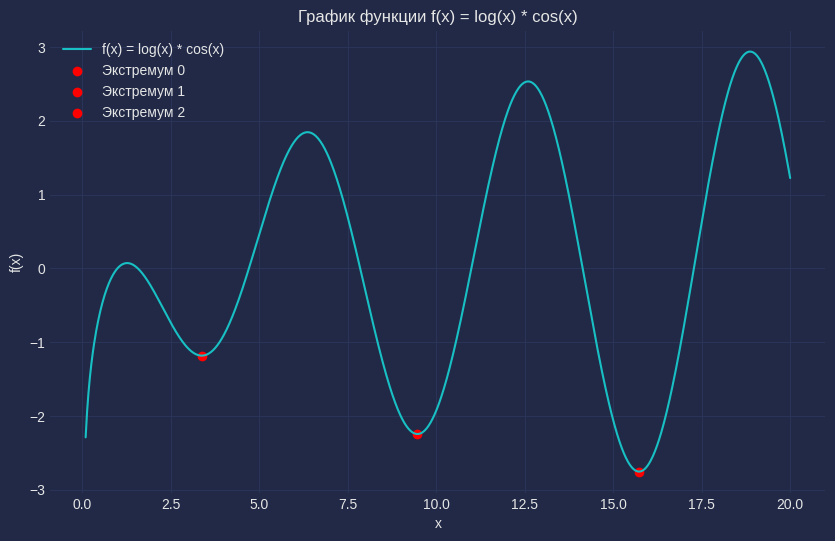

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log(x)*np.cos(x)

def gold(a, b, e):
    g1 = (3 - np.sqrt(5)) / 2
    g2 = (np.sqrt(5) - 1) / 2
    x1 = a + g1 * (b - a)
    x2 = a + g2 * (b - a)
    while abs(x1 - x2) > e:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1

        x1 = a + g1 * (b - a)
        x2 = a + g2 * (b - a)

    return (b + a) / 2


def extr(a, b, e, num=3):
    mins = []
    for i in range(num):
        min = gold(a, b, e)
        if (min, f(min)) not in mins:
            mins.append((min, f(min)))
        a = min
    return mins


a = 0.1
b = 20
e = 1e-6

extrs = extr(a, b, e)
print("Найденные экстремумы:")
for i, (x, y) in enumerate(extrs):
    print(f"Экстремум {i}: x = {x}, f(x) = {y}")




x = np.linspace(a, b, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = log(x) * cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x) = log(x) * cos(x)')

for i, (x, y) in enumerate(extrs):
    plt.scatter(x, y, color='red', label=f'Экстремум {i}')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ext21 = dichotomy(2.5, 5, f)
print("Экстремум 1:", ext21)
ext22 = dichotomy(7.5, 12.5, f)
print("Экстремум 2:", ext22)
ext23 = dichotomy(13, 17.5, f)
print("Экстремум 3:", ext23)
print()
print('Погрешность дихотомии от золотого сечения')
print("Погрешность 1:", ext21 - ext11)
print("Погрешность 2:", ext22 - ext12)
print("Погрешность 3:", ext23 - ext13)

Кол-во итераций 53
Экстремум 1: 3.379916143603623
Кол-во итераций 52
Экстремум 2: 9.471702203154564
Кол-во итераций 52
Экстремум 3: 15.731027777539566

Погрешность дихотомии от золотого сечения
Погрешность 1: 2.379916143603622
Погрешность 2: 7.471702203154564
Погрешность 3: 14.458177077186054
